In [1]:
!nvidia-smi

Tue Jun 11 11:41:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   59C    P0             N/A /   90W |    1258MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\mkiyak\Downloads\yolov8_segmentation_vein_dataset


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.7 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 148.5/465.1 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.__version__

'2.3.1+cu121'

In [ ]:
# GitHub reposunu klonlama
!git clone https://github.com/mkiyak/yolov8_segmentation_vein_dataset.git

# Klonlanan klasöre geçiş
%cd yolov8_segmentation_vein_dataset

# Tüm dosyaları /content dizinine taşıma
!mv * /content/

# Tekrar /content dizinine dönme
%cd /content

# İçeriği listeleme
!ls


Cloning into 'yolov8_segmentation_vein_dataset'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 150 (delta 2), reused 150 (delta 2), pack-reused 0
Receiving objects: 100% (150/150), 1.06 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/yolov8_segmentation_vein_dataset
mv: cannot move 'test' to '/content/test': Directory not empty
mv: cannot move 'train' to '/content/train': Directory not empty
/content
dataset.yaml  runs  train		     yolov8m-seg.pt
drive	      test  Vein_Segmentation.ipynb  yolov8_segmentation_vein_dataset


In [10]:
model = YOLO('dataset.yaml')  # Load custom model architecture
model.train(data='dataset.yaml', epochs=50)  # Train


                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   4720640  ultralytics.nn.modules.conv.Conv             [512

RuntimeError: Dataset 'dataset.yaml' error  
Dataset 'dataset.yaml' images not found , missing path 'C:\Users\mkiyak\Downloads\yolov8_segmentation_vein_dataset\datasets\test'
Note dataset download directory is 'C:\Users\mkiyak\Downloads\yolov8_segmentation_vein_dataset\datasets'. You can update this in 'C:\Users\mkiyak\AppData\Roaming\Ultralytics\settings.yaml'

/content


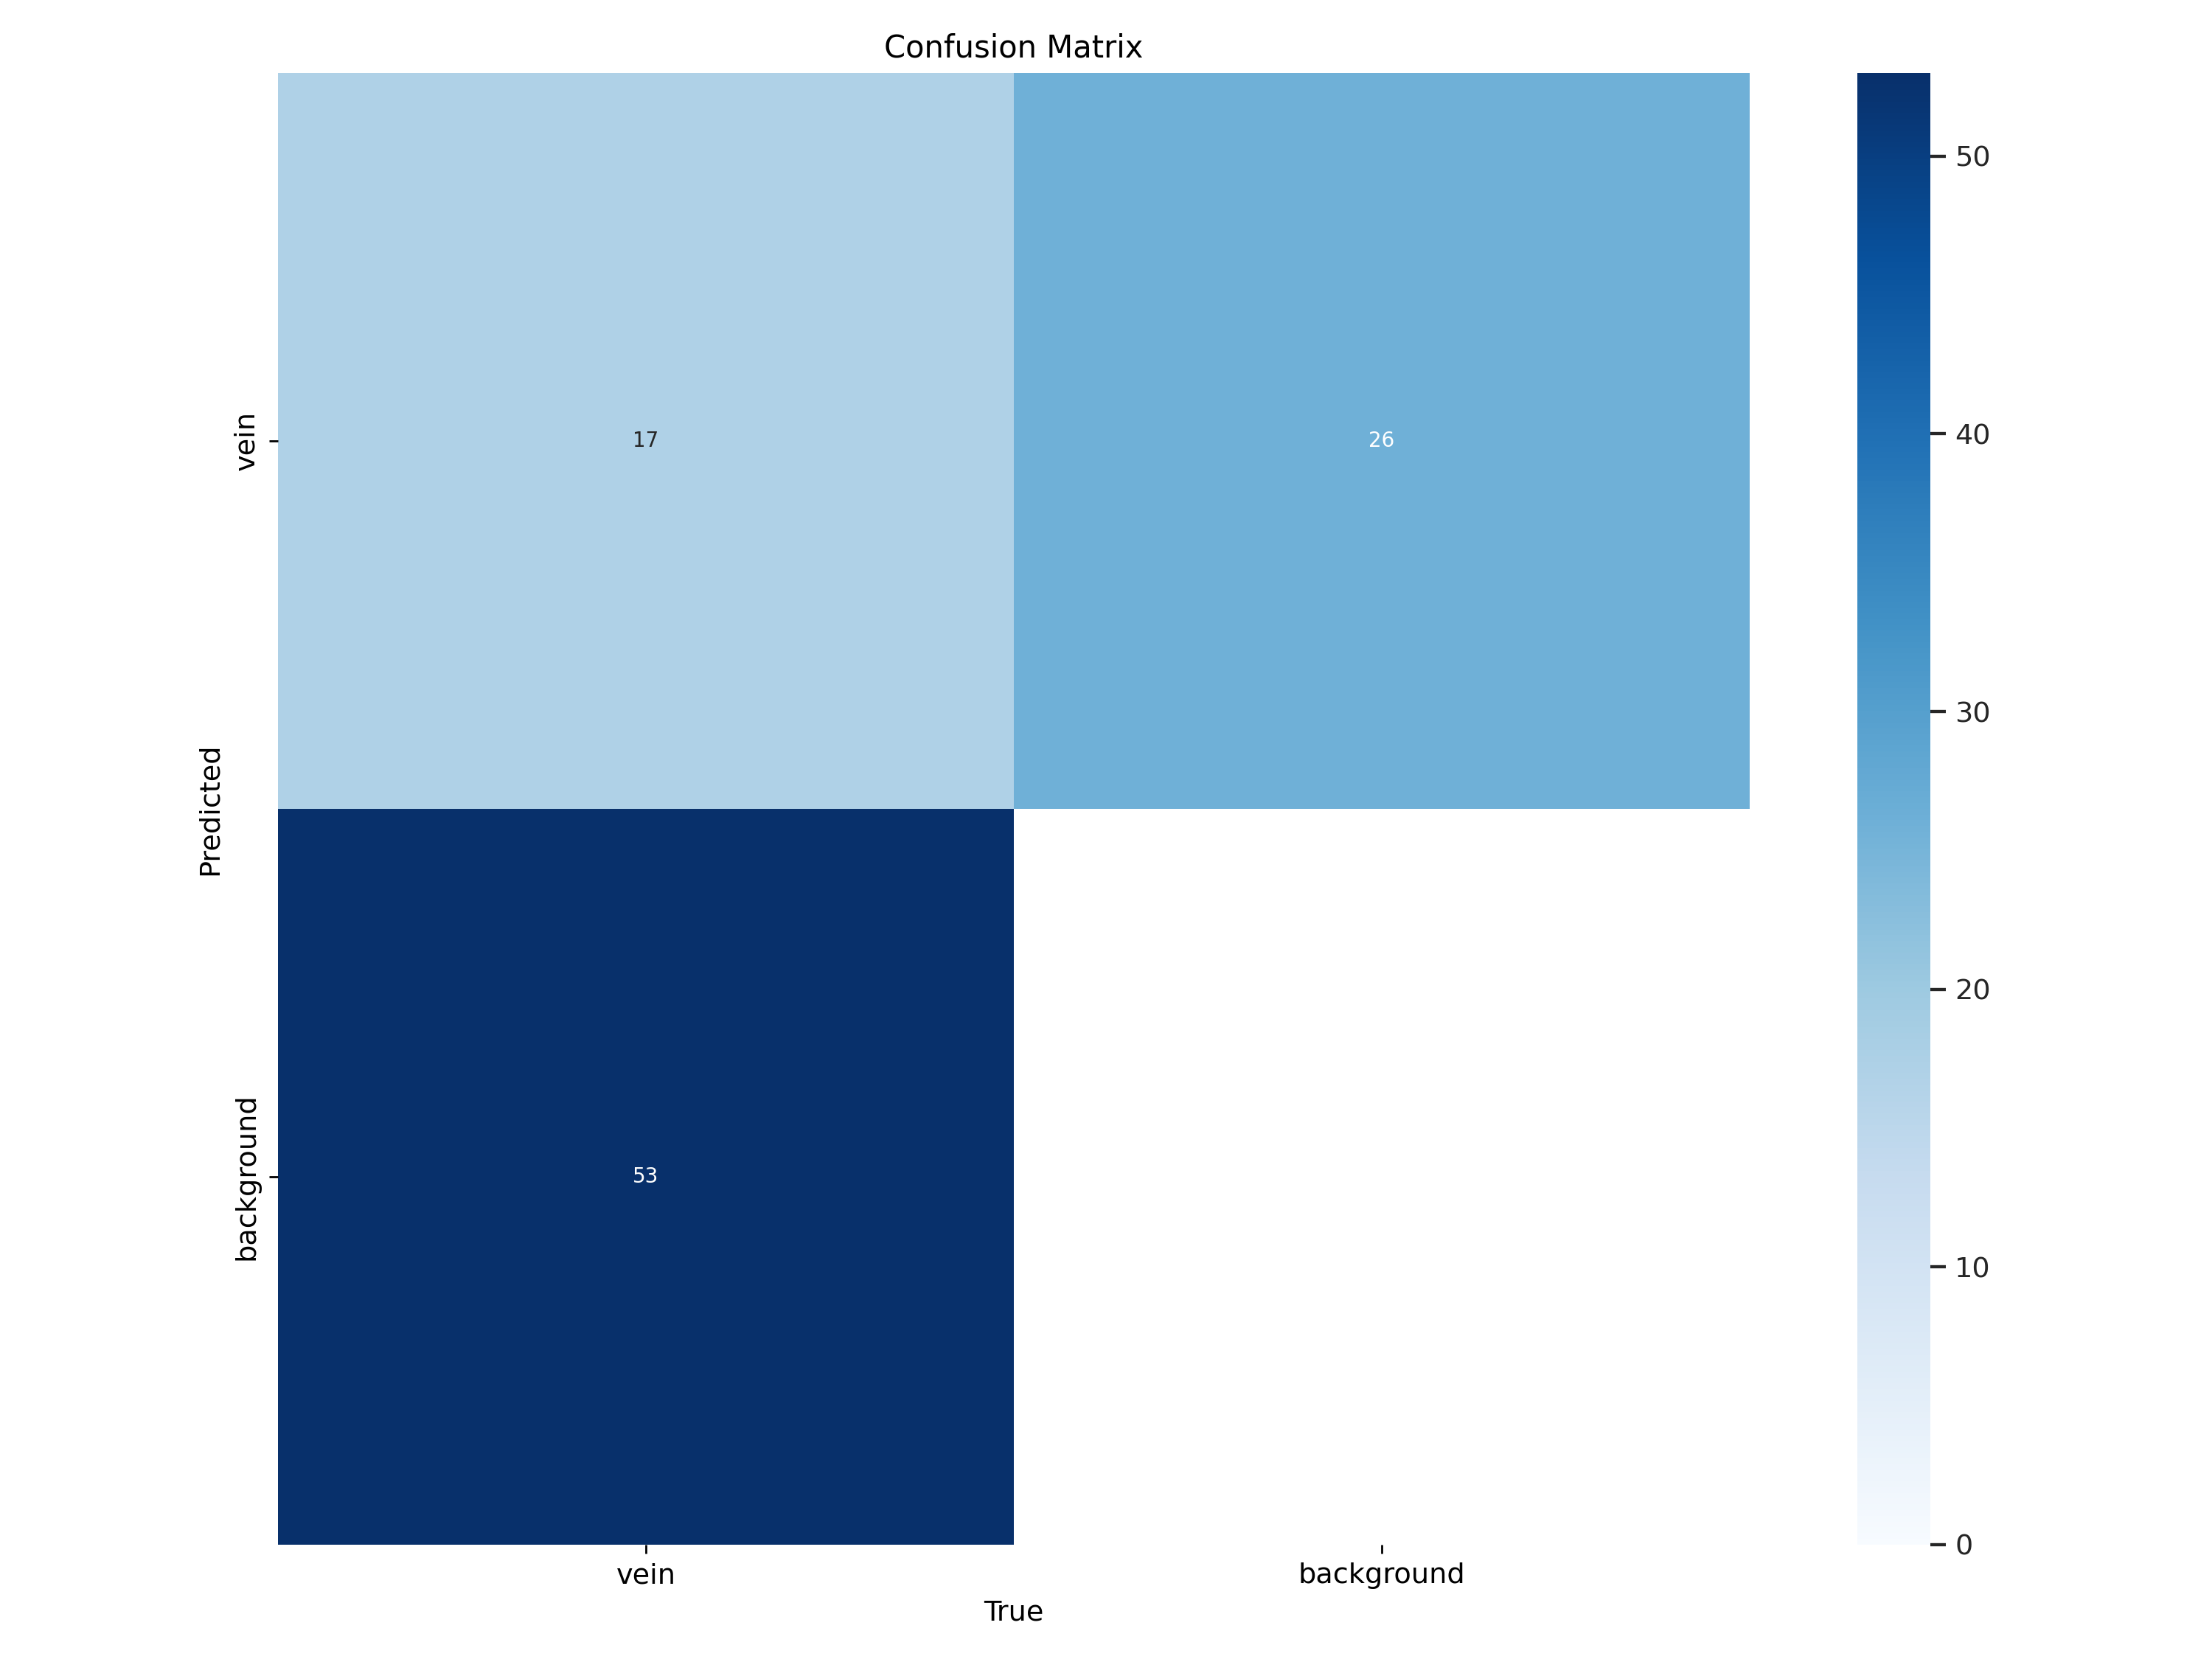

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

In [ ]:
from ultralytics import YOLO
model = YOLO(f'{HOME}/runs/segment/train2/weights/best.pt')

In [ ]:
results = model.predict(f'{HOME}/example.png', save=True)


image 1/1 /content/example.png: 640x224 4 veins, 44.1ms
Speed: 2.0ms preprocess, 44.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 224)
Results saved to runs/segment/predict3


In [ ]:
results = model.predict(f'{HOME}/example.png')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/example.png: 640x224 4 veins, 226.0ms
Speed: 1.5ms preprocess, 226.0ms inference, 1041.5ms postprocess per image at shape (1, 3, 640, 224)


In [ ]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'vein'}
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 

AttributeError: 'list' object has no attribute 'boxes'

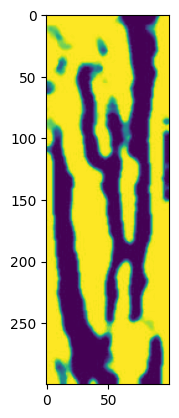

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Giriş görüntüsünü yükleyin
image = plt.imread(f'{HOME}/example.png')

# Yeni bir figür oluşturun
fig, ax = plt.subplots(1)

# Görüntüyü gösterme
ax.imshow(image)

# Kutuları çizme
for result in results.boxes.xyxy[0]:
    x1, y1, x2, y2 = result[:4]
    label = result[5]
    confidence = result[4]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1 - 10, f'{label} {confidence:.2f}', fontsize=8, color='g')

# Eksenleri kapatma
plt.axis('off')

# Görüntüyü gösterme
plt.show()

# Tahmin sonucunu kaydetme
fig.savefig('output_with_boxes.png', bbox_inches='tight', pad_inches=0)


In [ ]:
boxes = results.orig_img

# Kutuları gösterme
print(boxes)


AttributeError: 'list' object has no attribute 'orig_img'

In [ ]:
import cv2

# Giriş görüntüsünü yükleyin
image = cv2.imread('/content/example.png')

# Kutuları çizme
for result in results.boxes.xyxy[0]:
    x1, y1, x2, y2 = map(int, result[:4])
    label = result[5]
    confidence = result[4]
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, f'{label} {confidence:.2f}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Görüntüyü gösterme
cv2.imshow('YOLO Predictions', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Tahmin sonucunu kaydetme
cv2.imwrite('output_with_boxes.png', image)


AttributeError: 'list' object has no attribute 'boxes'

In [ ]:
results = model.predict(source=f'{HOME}/example.png', show=True, save=True, conf=0.5, save_txt=False, save_crop=False)

In [ ]:
# Yerel ayarları UTF-8 olarak ayarlama
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

# YOLO komutunu çalıştırma
!yolo task=segment mode=train epochs=50 data=dataset.yaml model=yolov8m-seg.pt imgsz=640 batch=8

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968